In [26]:
#import modul yang akan digunakan
import pandas as pd
import numpy as np
import zipfile
import os
import shutil
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
!unzip satelite_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: satelite_data/cloudy/train_23566.jpg  
  inflating: satelite_data/cloudy/train_23598.jpg  
  inflating: satelite_data/cloudy/train_23608.jpg  
  inflating: satelite_data/cloudy/train_23634.jpg  
  inflating: satelite_data/cloudy/train_23636.jpg  
  inflating: satelite_data/cloudy/train_23646.jpg  
 extracting: satelite_data/cloudy/train_2366.jpg  
  inflating: satelite_data/cloudy/train_23664.jpg  
  inflating: satelite_data/cloudy/train_23706.jpg  
  inflating: satelite_data/cloudy/train_2380.jpg  
 extracting: satelite_data/cloudy/train_23805.jpg  
  inflating: satelite_data/cloudy/train_23806.jpg  
  inflating: satelite_data/cloudy/train_23826.jpg  
 extracting: satelite_data/cloudy/train_23843.jpg  
 extracting: satelite_data/cloudy/train_23877.jpg  
  inflating: satelite_data/cloudy/train_23884.jpg  
  inflating: satelite_data/cloudy/train_23953.jpg  
  inflating: satelite_data/cloudy/train_2396.jpg  
  inflating: sat

In [5]:
!ls satelite_data

cloudy	desert	green_area  water


In [6]:
base_dir = "/content/drive/MyDrive/satelite_data"
data = pd.DataFrame(columns=['image_path', 'label'])

labels = {'/content/drive/MyDrive/satelite_data/cloudy' : 'Cloudy',
          '/content/drive/MyDrive/satelite_data/desert' : 'Desert',
          '/content/drive/MyDrive/satelite_data/green_area' : 'Green_Area',
          '/content/drive/MyDrive/satelite_data//water' : 'Water',
           }

In [7]:
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-7-7816f8083c24>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-7-7816f8083c24>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-7-7816f8083c24>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-7-7816f8083c24>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_

In [8]:
data.to_csv('image_dataset.csv', index=False)

In [9]:
df = pd.read_csv("/content/drive/MyDrive/image_dataset.csv")

In [10]:
df

,image_path,label
0,/content/drive/MyDrive/satelite_data/cloudy/tr...,Cloudy
1,/content/drive/MyDrive/satelite_data/cloudy/tr...,Cloudy
2,/content/drive/MyDrive/satelite_data/cloudy/tr...,Cloudy
3,/content/drive/MyDrive/satelite_data/cloudy/tr...,Cloudy
4,/content/drive/MyDrive/satelite_data/cloudy/tr...,Cloudy
...,...,...
5626,/content/drive/MyDrive/satelite_data//water/Se...,Water
5627,/content/drive/MyDrive/satelite_data//water/Se...,Water
5628,/content/drive/MyDrive/satelite_data//water/Se...,Water
5629,/content/drive/MyDrive/satelite_data//water/Se...,Water


In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=16,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=16,
                                                  class_mode="categorical")


Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (255,255,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(4, activation= 'softmax')
])

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [45]:
history = model.fit_generator(train_generator, epochs=15, validation_data=test_generator, callbacks=[callbacks])

<ipython-input-45-4740508cd7ac>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=15, validation_data=test_generator, callbacks=[callbacks])


Epoch 1/15
282/282 [==============================] - 83s 294ms/step - loss: 0.5514 - accuracy: 0.7209 - val_loss: 0.4832 - val_accuracy: 0.7977
Epoch 2/15
282/282 [==============================] - 82s 290ms/step - loss: 0.4425 - accuracy: 0.7973 - val_loss: 0.2944 - val_accuracy: 0.8784
Epoch 3/15
282/282 [==============================] - 82s 292ms/step - loss: 0.3827 - accuracy: 0.8355 - val_loss: 0.4895 - val_accuracy: 0.8021
Epoch 4/15
282/282 [==============================] - 81s 289ms/step - loss: 0.3579 - accuracy: 0.8557 - val_loss: 0.3388 - val_accuracy: 0.8545
Epoch 5/15
282/282 [==============================] - 83s 295ms/step - loss: 0.3517 - accuracy: 0.8603 - val_loss: 0.2739 - val_accuracy: 0.9033
Epoch 6/15
282/282 [==============================] - 80s 284ms/step - loss: 0.2960 - accuracy: 0.8823 - val_loss: 0.2950 - val_accuracy: 0.8758
Epoch 7/15
282/282 [==============================] - 82s 290ms/step - loss: 0.2811 - accuracy: 0.8781 - val_loss: 0.2760 - val_ac

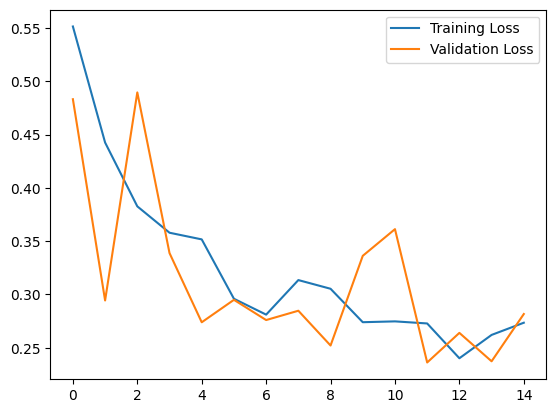

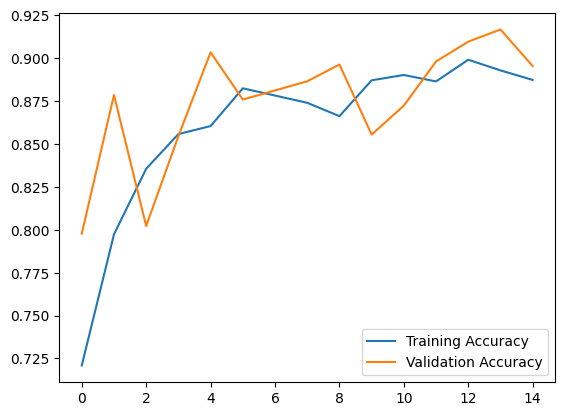

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [48]:
# Menyimpan model dalam format SavedModel
import pathlib
export_dir = '/content/drive/MyDrive'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

104329284